# Exploratory Data Analysis

## Libraries

In [5]:
import os
import sys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

import cv2

## Number of images

In [3]:
print(f"{os.listdir('./')}")

# number of images in each folder
print(f"train NORMAL: {len(os.listdir('./Lungs_Dataset/train/NORMAL'))}")
print(f"test NORMAL: {len(os.listdir('./Lungs_Dataset/test/NORMAL'))}")

print(f"train PNEUMONIA: {len(os.listdir('./Lungs_Dataset/train/PNEUMONIA'))}")
print(f"test PNEUMONIA: {len(os.listdir('./Lungs_Dataset/test/PNEUMONIA'))}")

print(f"train COVID19: {len(os.listdir('./Lungs_Dataset/train/COVID19'))}")
print(f"test COVID19: {len(os.listdir('./Lungs_Dataset/test/COVID19'))}")

['.DS_Store', 'Lung_Classification.py', 'EDA_lung_classif.ipynb', 'README.md', 'Lung_Segmentation.py', 'Lungs_Dataset', '.gitignore', 'requirements.yml', '.git', 'compvis_env', 'Body_Classification.py']
train NORMAL: 1266
test NORMAL: 317
train PNEUMONIA: 3418
test PNEUMONIA: 855
train COVID19: 460
test COVID19: 116


In [4]:
train_dir = './Lungs_Dataset/train'
test_dir = './Lungs_Dataset/test'


print("Train set:\n========================================")
num_normal_train = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
num_pneumonia_train = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_covid19_train = len(os.listdir(os.path.join(train_dir, 'COVID19')))

print(f"NORMAL={num_normal_train}")
print(f"PNEUMONIA={num_pneumonia_train}")
print(f"COVID19={num_covid19_train}\n")

print("Test set:\n========================================")
num_normal_test = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
num_pneumonia_test = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))
num_covid19_test = len(os.listdir(os.path.join(test_dir, 'COVID19')))

print(f"NORMAL={num_normal_test}")
print(f"PNEUMONIA={num_pneumonia_test}")
print(f"COVID19={num_covid19_test}")

Train set:
NORMAL=1266
PNEUMONIA=3418
COVID19=460

Test set:
NORMAL=317
PNEUMONIA=855
COVID19=116


## Load images

In [13]:
def load_data(folder: str) -> tuple[np.ndarray, np.ndarray]:
    images = []
    labels = []
    categories = os.listdir(folder)
    for category in categories:
        category_folder = os.path.join(folder, category)
        if not os.path.isdir(category_folder):  # Skip non-directory files
            continue
        for filename in os.listdir(category_folder):
            image_path = os.path.join(category_folder, filename)
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(category)
    return np.array(images), np.array(labels)

In [12]:
# Carga los datos de entrenamiento
train_images, train_labels = load_data(train_dir)
# Carga los datos de prueba
test_images, test_labels = load_data(test_dir)

/var/folders/nt/_4rnz5m56f5_kxv2q50zn7mr0000gn/T/ipykernel_873/1019995908.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


## Data visualization

In [25]:
def show_images(images, labels):
  # Obtén las etiquetas únicas presentes en test_labels
  unique_labels = np.unique(labels)

  # Crea una figura y subtramas para cada etiqueta
  fig, axs = plt.subplots(1, len(unique_labels), figsize=(12, 4))

  # Itera sobre las etiquetas únicas y muestra una imagen correspondiente a cada una
  for i, label in enumerate(unique_labels):
      # Encuentra el índice de la primera imagen con la etiqueta dada
      image_index = np.argmax(labels == label)
      
      # Obtiene la imagen y su etiqueta correspondiente
      image = images[image_index]
      image_label = labels[image_index]
      
      # Muestra la imagen y establece el título con la etiqueta
      axs[i].imshow(image)
      axs[i].set_title("Label: {}".format(image_label))
      axs[i].axis('off')
      
  # Ajusta el espaciado entre las subtramas y muestra la figura
  plt.tight_layout()
  plt.show()



# Pixel value distribution
def show_images_pixel_intensity(images, labels):
  # Obtén las etiquetas únicas presentes en test_labels
  unique_labels = np.unique(labels)

  # Crea una figura y subtramas para cada etiqueta
  fig, axs = plt.subplots(2, len(unique_labels), figsize=(12, 8))

  # Itera sobre las etiquetas únicas y muestra una imagen correspondiente a cada una
  for i, label in enumerate(unique_labels):
      # Encuentra el índice de la primera imagen con la etiqueta dada
      image_index = np.argmax(labels == label)
      
      # Obtiene la imagen y su etiqueta correspondiente
      image = images[image_index]
      image_label = labels[image_index]
      
      # Muestra la imagen en la primera fila y establece el título con la etiqueta
      axs[0, i].imshow(image)
      axs[0, i].set_title("Label: {}".format(image_label))
      axs[0, i].axis('off')

      # Muestra la distribución de las intensidades de píxeles en la segunda fila
      sns.histplot(image.ravel(), 
                   label=f"mean {np.mean(image):.4f} & sd {np.std(image):.4f}", 
                   kde=False, ax=axs[1, i])
      
      axs[1, i].legend(loc='upper center')
      axs[1, i].set_title('Distribution of Pixel Intensities in the Image')
      axs[1, i].set_xlabel('Pixel Intensity')
      axs[1, i].set_ylabel('# Pixels in Image')

  # Ajusta el espaciado entre las subtramas y muestra la figura
  plt.tight_layout()
  plt.show()

# Image info
def image_info(image: np.ndarray) -> None:
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title('Raw Chest X Ray Image')

    print(f"The dimensions of the image are {image.shape[0]} pixels width and {image.shape[1]} pixels height, one single color channel.")
    print(f"The maximum pixel value is {image.max():.4f} and the minimum is {image.min():.4f}")
    print(f"The mean value of the pixels is {image.mean():.4f} and the standard deviation is {image.std():.4f}")

### Images

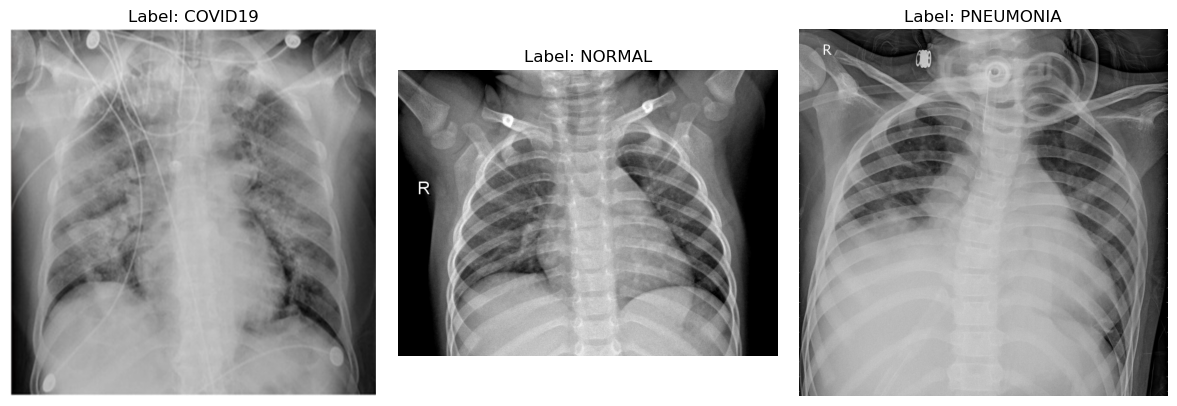

In [15]:
# TRAIN images
show_images(train_images, train_labels)

### Pixel value distribution


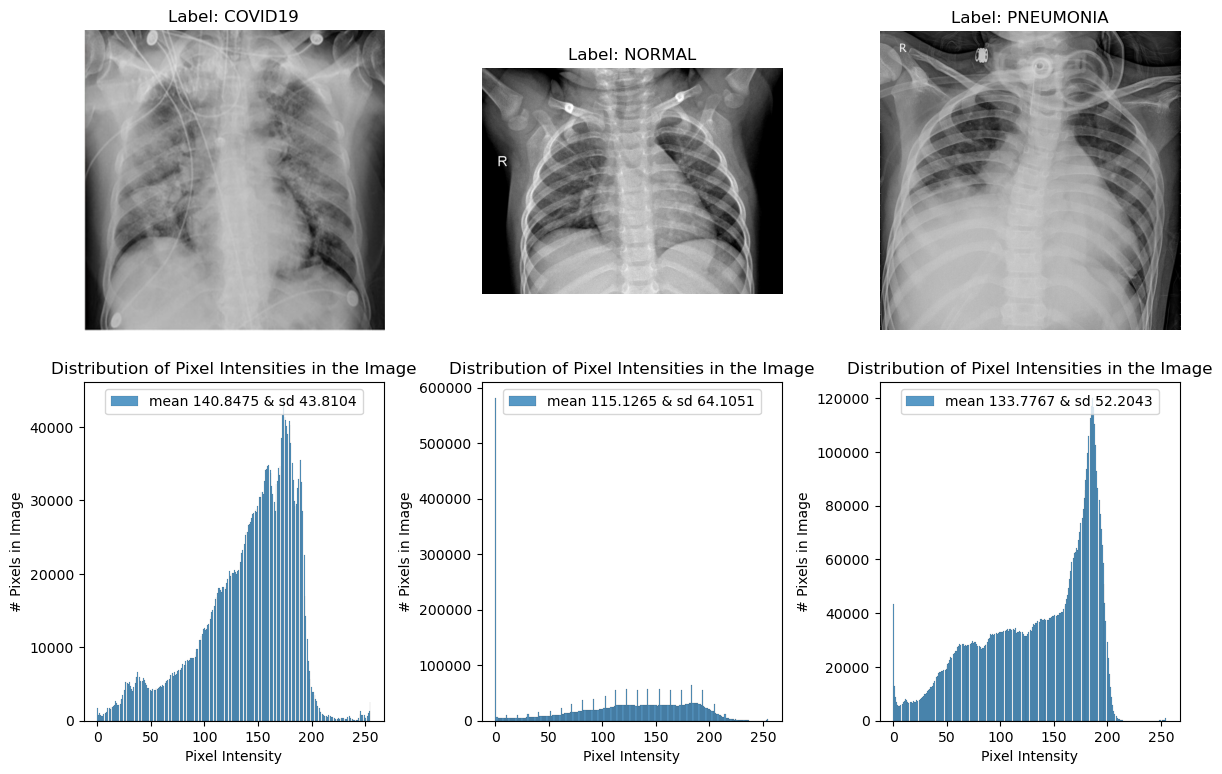

In [26]:
show_images_pixel_intensity(train_images, train_labels)

### Image information

The dimensions of the image are 1082 pixels width and 1439 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 115.1265 and the standard deviation is 64.1051


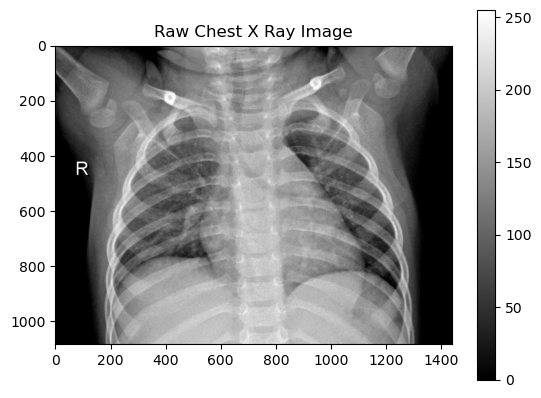

In [33]:
# normal
image_index_normal = np.argmax(train_labels == 'NORMAL')
image_normal = train_images[image_index_normal]
image_info(image_normal)

The dimensions of the image are 1544 pixels width and 1552 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 133.7767 and the standard deviation is 52.2043


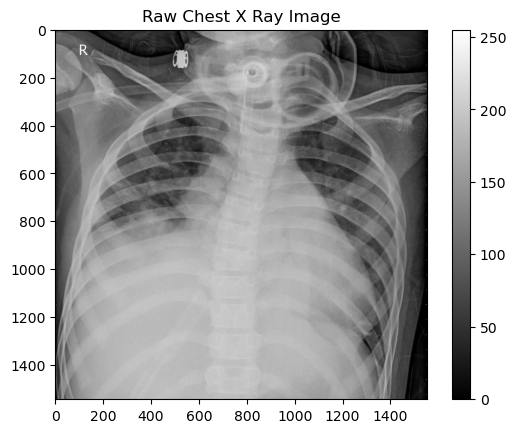

In [34]:
# pneumonia
image_index_pneumonia= np.argmax(train_labels == 'PNEUMONIA')
image_pneumonia = train_images[image_index_pneumonia]
image_info(image_pneumonia)


The dimensions of the image are 1024 pixels width and 1022 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 140.8475 and the standard deviation is 43.8104


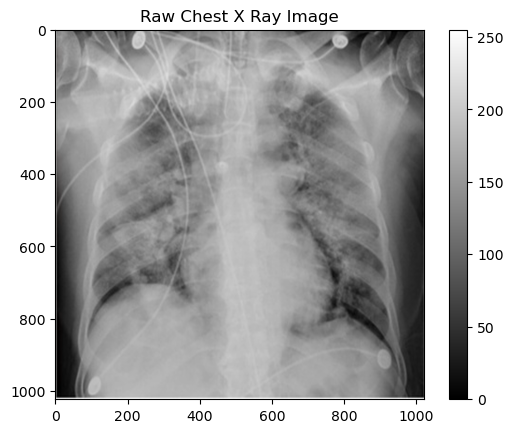

In [35]:
# covid19
image_index_covid = np.argmax(train_labels == 'COVID19')
image_covid = train_images[image_index_covid]
image_info(image_covid)